In [68]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Datei mit UTF-16-Codierung einlesen
data = pd.read_csv('data_nfdi4chem2023_survey.csv', encoding='utf-16', delimiter='\t')
values = pd.read_csv('values_nfdi4chem2023_survey.csv', encoding='utf-16', delimiter='\t')
variables = pd.read_csv('variables_nfdi4chem2023_survey.csv', encoding='utf-16', delimiter='\t')

In [69]:
data

,CASE,SERIAL,REF,QUESTNNR,MODE,STARTED,A001,A001s,A002,A002_05,...,MAILSENT,LASTDATA,FINISHED,Q_VIEWER,LASTPAGE,MAXPAGE,MISSING,MISSREL,TIME_RSI,DEG_TIME
0,191,NaN,NaN,CQ2023,interview,2023-01-23 10:11:10,276,NaN,1.0,NaN,...,NaN,2023-01-23 10:15:10,0,0,3,21,50,42,"1,25",17
1,203,NaN,NaN,CQ2023,interview,2023-01-25 08:56:50,276,NaN,2.0,NaN,...,NaN,2023-01-25 11:27:54,0,0,9,9,13,13,"0,68",2
2,207,NaN,NaN,CQ2023,interview,2023-01-25 09:01:56,276,NaN,1.0,NaN,...,NaN,2023-01-25 09:02:12,0,0,3,3,0,0,"1,79",50
3,208,NaN,NaN,CQ2023,interview,2023-01-25 09:02:26,-9,NaN,-9.0,NaN,...,NaN,2023-01-25 09:04:12,0,0,12,12,83,81,"1,59",100
4,209,NaN,NaN,CQ2023,interview,2023-01-25 09:03:06,-9,NaN,NaN,NaN,...,NaN,2023-01-25 09:03:16,0,0,2,2,100,100,"2,29",73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,2548,NaN,NaN,CQ2023,interview,2023-04-06 17:45:24,276,NaN,NaN,NaN,...,NaN,2023-04-06 17:46:09,0,0,2,2,0,0,"0,92",14
809,2552,NaN,NaN,CQ2023,interview,2023-04-07 10:38:23,276,NaN,1.0,NaN,...,NaN,2023-04-07 10:57:23,1,0,38,38,9,3,"1,13",17
810,2553,NaN,NaN,CQ2023,interview,2023-04-07 15:32:18,276,NaN,5.0,NaN,...,NaN,2023-04-07 15:35:30,0,0,21,21,29,20,"1,55",56
811,2572,NaN,NaN,CQ2023,interview,2023-04-12 11:55:23,826,NaN,5.0,Independent analytical informatics consultant,...,NaN,2023-04-12 12:06:22,0,0,29,29,3,1,"1,09",15


In [70]:
values

,VAR,RESPONSE,MEANING
0,A001,1001,Apsny
1,A001,4,Afghanestan
2,A001,8,Albania
3,A001,10,Antarctic
4,A001,12,Algeria
...,...,...,...
488,C008,-9,nicht beantwortet
489,FINISHED,0,abgebrochen
490,FINISHED,1,ausgefüllt
491,Q_VIEWER,0,Teilnehmer


In [71]:
variables

,VAR,LABEL,TYPE,INPUT,QUESTION
0,CASE,Interview-Nummer (fortlaufend),METRIC,SYSTEM,NaN
1,SERIAL,Seriennummer (sofern verwendet),TEXT,SYSTEM,NaN
2,REF,Referenz (sofern im Link angegeben),TEXT,SYSTEM,NaN
3,QUESTNNR,"Fragebogen, der im Interview verwendet wurde",TEXT,SYSTEM,NaN
4,MODE,Interview-Modus,TEXT,SYSTEM,NaN
...,...,...,...,...,...
190,MAXPAGE,"Letzte Seite, die im Fragebogen bearbeitet wurde",METRIC,SYSTEM,NaN
191,MISSING,Anteil fehlender Antworten in Prozent,METRIC,SYSTEM,NaN
192,MISSREL,Anteil fehlender Antworten (gewichtet nach Rel...,METRIC,SYSTEM,NaN
193,TIME_RSI,Maluspunkte für schnelles Ausfüllen,METRIC,SYSTEM,NaN


## Data Cleaning

In [72]:
df_data = pd.DataFrame (data)

In [73]:
# Spaltenüberschriften als Liste ausgeben
spalten_ueberschriften = df_data.columns.tolist()
print(spalten_ueberschriften)

['CASE', 'SERIAL', 'REF', 'QUESTNNR', 'MODE', 'STARTED', 'A001', 'A001s', 'A002', 'A002_05', 'A003', 'A003_07', 'A004', 'A004_01', 'A004_02', 'A004_03', 'A004_04', 'A004_05', 'A004_06', 'A004_07', 'A004_08', 'A004_09', 'A004_10', 'A004_11', 'A004_12', 'A004_13', 'A004_13a', 'B001', 'B001_01', 'B001_02', 'B001_03', 'B001_04', 'B001_05', 'B001_06', 'B001_07', 'B001_08', 'B001_08a', 'B002', 'B003_01', 'B004', 'B005_01', 'B006', 'B006_01', 'B006_02', 'B006_03', 'B006_04', 'B006_04a', 'B006_05', 'B006_06', 'B007', 'B025_01', 'B008_CN', 'B008x01', 'B008x02', 'B008x03', 'B008x04', 'B008x05', 'B008x06', 'B008x07', 'B008x08', 'B008x09', 'B027_01', 'B009', 'B026_01', 'B010', 'B011', 'B012', 'B013_01', 'B014', 'B014_01', 'B014_02', 'B014_03', 'B014_04', 'B014_05', 'B014_06', 'B014_07', 'B014_08', 'B014_08a', 'B015', 'B015_01', 'B015_02', 'B015_03', 'B015_04', 'B015_05', 'B015_06', 'B015_08', 'B015_08a', 'B015_07', 'B016', 'B016_01', 'B016_02', 'B016_03', 'B016_04', 'B016_05', 'B016_06', 'B016_07'

In [74]:
# Teilnehmenden betrachten. Gibt es Durchklicker bei diesem Fragebogen?
# Subset erstellen
participants = df_data [['CASE', 'Q_VIEWER']]
participants.groupby('Q_VIEWER').count()

,CASE
Q_VIEWER,
0,813


Das System bewertet automatisch, ob sich jemand nur durch den Fragebogen klickt. Nach dem System scheint es keine Durchklicker zu geben.

In [75]:
# DataFrame mit ausgewählten Spalten erstellen
selected_columns = ['CASE', 'A001', 'A001s', 'A002', 'A002_05', 'A003', 'A003_07', 'A004', 'A004_01', 'A004_02', 'A004_03', 'A004_04', 'A004_05', 'A004_06', 'A004_07', 'A004_08', 'A004_09', 'A004_10', 'A004_11', 'A004_12', 'A004_13', 'A004_13a', 'B001', 'B001_01', 'B001_02', 'B001_03', 'B001_04', 'B001_05', 'B001_06', 'B001_07', 'B001_08', 'B001_08a', 'B002', 'B003_01', 'B004', 'B005_01', 'B006', 'B006_01', 'B006_02', 'B006_03', 'B006_04', 'B006_04a', 'B006_05', 'B006_06', 'B007', 'B025_01', 'B008_CN', 'B008x01', 'B008x02', 'B008x03', 'B008x04', 'B008x05', 'B008x06', 'B008x07', 'B008x08', 'B008x09', 'B027_01', 'B009', 'B026_01', 'B010', 'B011', 'B012', 'B013_01', 'B014', 'B014_01', 'B014_02', 'B014_03', 'B014_04', 'B014_05', 'B014_06', 'B014_07', 'B014_08', 'B014_08a', 'B015', 'B015_01', 'B015_02', 'B015_03', 'B015_04', 'B015_05', 'B015_06', 'B015_08', 'B015_08a', 'B015_07', 'B016', 'B016_01', 'B016_02', 'B016_03', 'B016_04', 'B016_05', 'B016_06', 'B016_07', 'B016_09', 'B016_09a', 'B016_08', 'B017', 'B017_01', 'B017_02', 'B017_03', 'B017_04', 'B017_05', 'B017_05a', 'B018', 'B018_01', 'B019', 'B019_01', 'B019_02', 'B019_03', 'B019_04', 'B019_05', 'B019_05a', 'B019_06', 'B019_07', 'B019_08', 'B019_09', 'B019_10', 'B019_10a', 'B020_01', 'B021', 'B021_01', 'B022_01', 'B023_01', 'B024', 'B024_01', 'B024_02', 'B024_03', 'B024_04', 'B024_05', 'B024_06', 'B024_07', 'B024_08', 'B024_08a', 'C001', 'C002', 'C003', 'C003_01', 'C004', 'C005_01', 'C006', 'C008', 'C008_03', 'C009_01']
df_questions_2023 = df_data[selected_columns]
df_questions_2023

,CASE,A001,A001s,A002,A002_05,A003,A003_07,A004,A004_01,A004_02,...,C001,C002,C003,C003_01,C004,C005_01,C006,C008,C008_03,C009_01
0,191,276,NaN,1.0,NaN,7.0,NaN,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,203,276,NaN,2.0,NaN,2.0,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,207,276,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,208,-9,NaN,-9.0,NaN,-9.0,NaN,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,209,-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,2548,276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
809,2552,276,NaN,1.0,NaN,1.0,NaN,1.0,1.0,2.0,...,1.0,1.0,2.0,NaN,2.0,Cannot guarantee that every co-worker responsi...,1.0,1.0,NaN,"Processing platform, conversion of the data in..."
810,2553,276,NaN,5.0,NaN,7.0,NaN,4.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811,2572,826,NaN,5.0,Independent analytical informatics consultant,7.0,Owner,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Die Anzahl der Spalten hat sich nicht verändert, daher gibt es keine Spalten ohne Werte.

In [76]:
# Spalten filtern, deren Werte nur NaN sind
result_columns = df_questions_2023.columns[df_questions_2023.isna().all()]
# Spaltennamen anzeigen
print(result_columns)

Index([], dtype='object')


Da der Index leer ist, enthält jede Spalte mindestens einen Wert.

In [77]:
# DataFrame bereinigen, indem Reihen mit nur NaN-Werten entfernt werden
df_questions_2023_clean = df_questions_2023.dropna(axis=0, how='all')
df_questions_2023_clean

,CASE,A001,A001s,A002,A002_05,A003,A003_07,A004,A004_01,A004_02,...,C001,C002,C003,C003_01,C004,C005_01,C006,C008,C008_03,C009_01
0,191,276,NaN,1.0,NaN,7.0,NaN,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,203,276,NaN,2.0,NaN,2.0,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,207,276,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,208,-9,NaN,-9.0,NaN,-9.0,NaN,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,209,-9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,2548,276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
809,2552,276,NaN,1.0,NaN,1.0,NaN,1.0,1.0,2.0,...,1.0,1.0,2.0,NaN,2.0,Cannot guarantee that every co-worker responsi...,1.0,1.0,NaN,"Processing platform, conversion of the data in..."
810,2553,276,NaN,5.0,NaN,7.0,NaN,4.0,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
811,2572,826,NaN,5.0,Independent analytical informatics consultant,7.0,Owner,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Da sich die Anzahl der Reihen nicht geändert hat, gibt es keine komplett leeren Reihen. Daher wird geschaut, welche Reihen nach den bibliografischen Angaben (Spalte A003) leer sind.

In [78]:
# Zeilen filtern, bei denen nach der Spalte A002 keine Einträge mehr folgen (alle Werte sind NaN)
result_rows = df_questions_2023[df_questions_2023.iloc[:, df_questions_2023.columns.get_loc('A002')+1:].isna().all(axis=1)]

# gefundenen leeren Zeilen aus dem DataFrame entfernen und einen bereinigten DataFrame erzeugen 
df_cleanquest_2023 = df_questions_2023.drop(result_rows.index)

# neuer DataFrame
print(df_cleanquest_2023)

     CASE  A001 A001s  A002                                        A002_05  \
0     191   276   NaN   1.0                                            NaN   
1     203   276   NaN   2.0                                            NaN   
3     208    -9   NaN  -9.0                                            NaN   
7     220   276   NaN   1.0                                            NaN   
8     222   276   NaN   2.0                                            NaN   
..    ...   ...   ...   ...                                            ...   
806  2545   276   NaN   1.0                                            NaN   
807  2546   276   NaN   1.0                                            NaN   
809  2552   276   NaN   1.0                                            NaN   
810  2553   276   NaN   5.0                                            NaN   
811  2572   826   NaN   5.0  Independent analytical informatics consultant   

     A003 A003_07  A004  A004_01  A004_02  ...  C001  C002  C00

 45 Teilnehmende haben somit keine Informationen außer teilweise Landzugehörigkeit und Position in die Umfrage gegeben.

In [79]:
df_values = pd.DataFrame (values)

In [80]:
df_values

,VAR,RESPONSE,MEANING
0,A001,1001,Apsny
1,A001,4,Afghanestan
2,A001,8,Albania
3,A001,10,Antarctic
4,A001,12,Algeria
...,...,...,...
488,C008,-9,nicht beantwortet
489,FINISHED,0,abgebrochen
490,FINISHED,1,ausgefüllt
491,Q_VIEWER,0,Teilnehmer


In [81]:
df_cleanquest_2023.columns

Index(['CASE', 'A001', 'A001s', 'A002', 'A002_05', 'A003', 'A003_07', 'A004',
       'A004_01', 'A004_02',
       ...
       'C001', 'C002', 'C003', 'C003_01', 'C004', 'C005_01', 'C006', 'C008',
       'C008_03', 'C009_01'],
      dtype='object', length=141)

## Color Code for NFDI4Chem colors

In [82]:
# Definiere die NFDI4Chem-Farben
petrol_rgb = (0/255, 156/255, 188/255)
orange_rgb = (238/255, 116/255, 0/255)
yellow_rgb = (241/255, 222/255, 30/255)

## A01. In which country have you done most of your research in the last 3 years?

In [83]:
# eindeutigen Werte der Spalte ausgeben, keine Duplikate
df_values["VAR"].unique()

array(['A001', 'A002', 'A003', 'A004_01', 'A004_02', 'A004_03', 'A004_04',
       'A004_05', 'A004_06', 'A004_07', 'A004_08', 'A004_09', 'A004_10',
       'A004_11', 'A004_12', 'A004_13', 'B001_01', 'B001_02', 'B001_03',
       'B001_04', 'B001_05', 'B001_06', 'B001_07', 'B001_08', 'B002',
       'B004', 'B006_01', 'B006_02', 'B006_03', 'B006_04', 'B006_05',
       'B006_06', 'B007', 'B008x01', 'B008x02', 'B008x03', 'B008x04',
       'B008x05', 'B008x06', 'B008x07', 'B008x08', 'B008x09', 'B009',
       'B010', 'B011', 'B012', 'B014_01', 'B014_02', 'B014_03', 'B014_04',
       'B014_05', 'B014_06', 'B014_07', 'B014_08', 'B015_01', 'B015_02',
       'B015_03', 'B015_04', 'B015_05', 'B015_06', 'B015_08', 'B015_07',
       'B016_01', 'B016_02', 'B016_03', 'B016_04', 'B016_05', 'B016_06',
       'B016_07', 'B016_09', 'B016_08', 'B017_01', 'B017_02', 'B017_03',
       'B017_04', 'B017_05', 'B018', 'B019_01', 'B019_02', 'B019_03',
       'B019_04', 'B019_05', 'B019_06', 'B019_07', 'B019_08', 

In [84]:
# DataFrame erstellen, der nur die Werte in der Spalte "VAR" gleich "A001"enthält
values_A001=df_values[df_values["VAR"]=="A001"]

In [85]:
values_A001

,VAR,RESPONSE,MEANING
0,A001,1001,Apsny
1,A001,4,Afghanestan
2,A001,8,Albania
3,A001,10,Antarctic
4,A001,12,Algeria
...,...,...,...
250,A001,887,Yemen
251,A001,894,Zambia
252,A001,716,Zimbabwe
253,A001,-2,sonstige Texteingabe


In [86]:
# Wert in der Spalte "A001" auf Bedeutungswert ("MEANING") mappen und in eine neue Spalte "A001-m" speichern
df_cleanquest_2023["A001-m"]=df_cleanquest_2023["A001"].map(values_A001.drop_duplicates("RESPONSE").set_index("RESPONSE")["MEANING"])
print(df_cleanquest_2023["A001-m"])

0                Germany
1                Germany
3      nicht beantwortet
7                Germany
8                Germany
             ...        
806              Germany
807              Germany
809              Germany
810              Germany
811       United Kingdom
Name: A001-m, Length: 768, dtype: object


In [87]:
df_cleanquest_2023[["CASE","A001","A001-m"]]

,CASE,A001,A001-m
0,191,276,Germany
1,203,276,Germany
3,208,-9,nicht beantwortet
7,220,276,Germany
8,222,276,Germany
...,...,...,...
806,2545,276,Germany
807,2546,276,Germany
809,2552,276,Germany
810,2553,276,Germany


In [88]:
# Zähle die Zellen mit gleichem Inhalt zusammen. Diese als Series ausgeben
value_counts = df_cleanquest_2023['A001-m'].value_counts()
print(value_counts)

Germany                               669
Netherlands                            22
United Kingdom                         10
France                                  8
India                                   8
nicht beantwortet                       8
United States                           7
Switzerland                             7
Austria                                 4
Belgium                                 3
Czech Republic                          3
China (People's Republic of China)      2
Spain                                   2
Pakistan                                2
Canada                                  1
Sudan                                   1
Japan                                   1
Ukraine                                 1
Norway                                  1
South Korea                             1
Iceland                                 1
Bangladesch                             1
Poland                                  1
Israel                            

<AxesSubplot:>

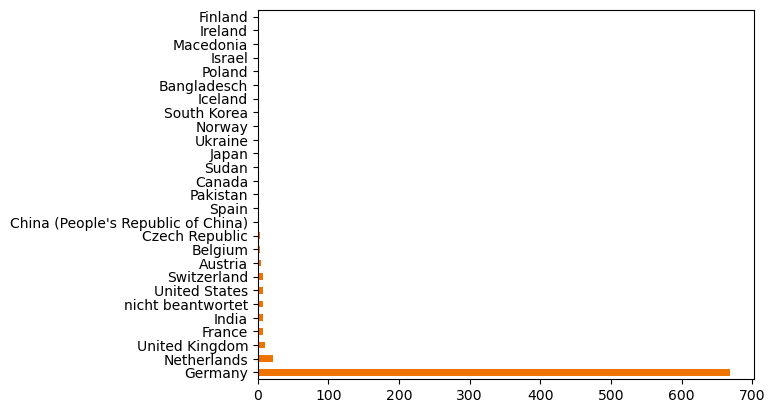

In [89]:
df_cleanquest_2023['A001-m'].value_counts().plot.barh(color=orange_rgb)

In [90]:
# aus Series einen df erzeugen
df_A001 = df_cleanquest_2023['A001-m'].value_counts().to_frame()

# Spaltennamen ändern
df_A001.reset_index(inplace=True)
df_A001.rename(columns={'index': 'country', 'A001-m': 'quantity'}, inplace=True)
df_A001

,country,quantity
0,Germany,669
1,Netherlands,22
2,United Kingdom,10
3,France,8
4,India,8
5,nicht beantwortet,8
6,United States,7
7,Switzerland,7
8,Austria,4
9,Belgium,3


In [91]:
# Spalte quantity konvertieren und dem Typ int zuweisen
df_A001['quantity'] = df_A001['quantity'].astype('int')
print(df_A001.columns)

Index(['country', 'quantity'], dtype='object')


In [92]:
# Zeilen nach Häufigkeit gruppieren und zusammenfassen, so dass Länder mit einem Eintrag, zwei Einträgen, etc. zusammen erscheinen
grouped_df_A001 = df_A001.groupby('quantity')['country'].apply(', '.join).reset_index()
print(grouped_df_A001)

   quantity                                            country
0         1  Canada, Sudan, Japan, Ukraine, Norway, South K...
1         2  China (People's Republic of China), Spain, Pak...
2         3                            Belgium, Czech Republic
3         4                                            Austria
4         7                         United States, Switzerland
5         8                   France, India, nicht beantwortet
6        10                                     United Kingdom
7        22                                        Netherlands
8       669                                            Germany


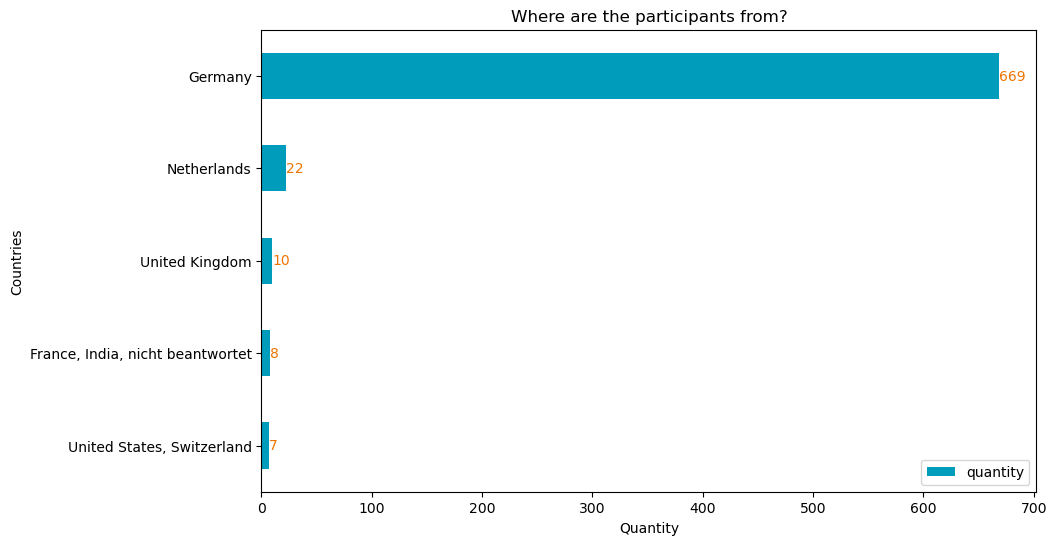

In [93]:
# Zeilen mit einer Quantity von über 4 filtern
grouped_df_A001_filter = grouped_df_A001[grouped_df_A001['quantity'] > 4]

#Größe des Diagramms anpassen
fig, ax = plt.subplots(figsize=(10, 6))  

# Spalte "country" als Index setzen
grouped_df_A001_filter.set_index('country', inplace=True)

# Daten als horizontales Balkendiagramm plotten
bars_A001 = grouped_df_A001_filter.plot.barh(ax=ax, color=petrol_rgb)

# absoluten Werte in die Balken einfügen
for bar in bars_A001.patches:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, int(bar.get_width()),
            va='center', ha='left', color=orange_rgb)

plt.xlabel('Quantity')
plt.ylabel('Countries')
plt.title('Where are the participants from?')

# Diagramm anzeigen
plt.show()

In [94]:
# Freitextantworten zur Frage anzeigen ->Spalte A001s
df_cleanquest_2023["A001s"].value_counts()

Series([], Name: A001s, dtype: int64)

669 Researchers who participated in the survey are coming from Germany. 22 are coming from the Netherlands and 10 from UK. From Switzerland, France and India participated 8 per country and also 8 did answered. Just 7 did their research in the US and Switzerland each and 4 in Austria. 3 each are coming from Czech Republic and Belgium and 2 each from Pakistan, China and Spain. Only one each did her/ his research in Israel, South Korea, Norway, Ukraine, Sudan, Canada, Bangladesch, Japan, Macadonia, Ireland, Poland, Iceland and Finland. Just one belong to any country.

## A02. To which type of institution do you belong?

In [95]:
print(df_cleanquest_2023.columns)

Index(['CASE', 'A001', 'A001s', 'A002', 'A002_05', 'A003', 'A003_07', 'A004',
       'A004_01', 'A004_02',
       ...
       'C002', 'C003', 'C003_01', 'C004', 'C005_01', 'C006', 'C008', 'C008_03',
       'C009_01', 'A001-m'],
      dtype='object', length=142)


In [96]:
df_cleanquest_2023[["CASE","A002"]]

,CASE,A002
0,191,1.0
1,203,2.0
3,208,-9.0
7,220,1.0
8,222,2.0
...,...,...
806,2545,1.0
807,2546,1.0
809,2552,1.0
810,2553,5.0


In [97]:
values_A002=df_values[df_values["VAR"]=="A002"]
values_A002

,VAR,RESPONSE,MEANING
255,A002,1,University
256,A002,2,Non-university research institution
257,A002,3,Industry
258,A002,4,Infrastructure facility/IT centre
259,A002,5,Other:
260,A002,-9,nicht beantwortet


In [98]:
df_cleanquest_2023["A002-m"]=df_cleanquest_2023["A002"].map(values_A002.drop_duplicates("RESPONSE").set_index("RESPONSE")["MEANING"])
df_cleanquest_2023["A002-m"]

0                               University
1      Non-university research institution
3                        nicht beantwortet
7                               University
8      Non-university research institution
                      ...                 
806                             University
807                             University
809                             University
810                                 Other:
811                                 Other:
Name: A002-m, Length: 768, dtype: object

In [99]:
df_cleanquest_2023[["CASE","A002","A002-m"]]

,CASE,A002,A002-m
0,191,1.0,University
1,203,2.0,Non-university research institution
3,208,-9.0,nicht beantwortet
7,220,1.0,University
8,222,2.0,Non-university research institution
...,...,...,...
806,2545,1.0,University
807,2546,1.0,University
809,2552,1.0,University
810,2553,5.0,Other:


In [100]:
value_counts = df_cleanquest_2023['A002-m'].value_counts()
value_counts

University                             603
Non-university research institution     91
Industry                                46
Other:                                  21
Infrastructure facility/IT centre        4
nicht beantwortet                        3
Name: A002-m, dtype: int64

<AxesSubplot:>

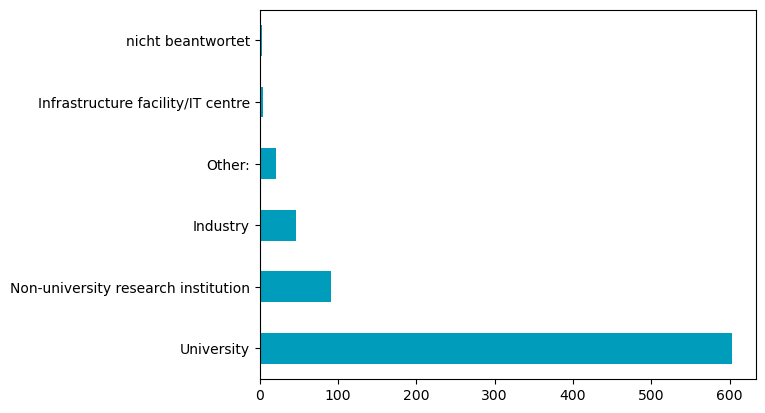

In [101]:
df_cleanquest_2023['A002-m'].value_counts().plot.barh(color=petrol_rgb)

In [102]:
df_A002 = df_cleanquest_2023['A002-m'].value_counts().to_frame()

df_A002.reset_index(inplace=True)
df_A002.rename(columns={'index': 'affiliation', 'A002-m': 'quantity'}, inplace=True)

df_A002

,affiliation,quantity
0,University,603
1,Non-university research institution,91
2,Industry,46
3,Other:,21
4,Infrastructure facility/IT centre,4
5,nicht beantwortet,3


In [103]:
# Freitextantworten und Häufigkeit zur Frage anzeigen ->Spalte A002_5s
df_A002_a = df_cleanquest_2023['A002_05'].value_counts().to_frame()

df_A002_a.reset_index(inplace=True)

df_A002_a.rename(columns={'index': 'affiliation', 'A002_05': 'quantity'}, inplace=True)
df_A002_a

,affiliation,quantity
0,Governmental research institution,1
1,Fachhochschule,1
2,ChemInformatic consultant,1
3,2 affiliations University and npon-univ. res.i...,1
4,"network for process analytics, former university",1
5,Indian Institute of Technology Kanpur,1
6,Government lab,1
7,…,1
8,patent attorney firm,1
9,University and non-University research institu...,1


In [104]:
# Werte in Zeile 3, 9 14 der Spalte 'affiliation' mit 'Two affiliations' üerschreiben
df_A002_a.at[3, 'affiliation'] = 'Two affiliations'
df_A002_a.at[9, 'affiliation'] = 'Two affiliations'
df_A002_a.at[12, 'affiliation'] = 'Two affiliations'
df_A002_a.at[14, 'affiliation'] = 'Two affiliations'

df_A002_a.at[10, 'affiliation'] = 'Freelancer'

df_A002_a.at[5, 'affiliation'] = 'Non-university research institution'

df_A002_a.at[7, 'affiliation'] = 'nicht beantwortet'


# Einzelne Begriffe in Spalte 'affiliation' durch einen übergeordneten Begriff ersetzen
df_A002_a['affiliation'] = df_A002_a['affiliation'].replace(['Fachhochschule', 'University of Applied Science and Arts', 'University of Applied Sciences'], 'University of Applied Science')

df_A002_a['affiliation'] = df_A002_a['affiliation'].replace(r'(?i).*industry.*', 'Industry', regex=True)

df_A002_a['affiliation'] = df_A002_a['affiliation'].replace(r'(?i).*government.*', 'Governmental', regex=True)

df_A002_a['affiliation'] = df_A002_a['affiliation'].replace(r'(?i).*freelancer.*', 'Freelancer', regex=True)

df_A002_a['affiliation'] = df_A002_a['affiliation'].replace(r'(?i).*consultant.*', 'Consultant', regex=True)

df_A002_a['affiliation'].value_counts()

Two affiliations                                    4
University of Applied Science                       3
Governmental                                        2
Consultant                                          2
Freelancer                                          2
Industry                                            2
network for process analytics, former university    1
Non-university research institution                 1
nicht beantwortet                                   1
patent attorney firm                                1
University Hospital                                 1
Name: affiliation, dtype: int64

In [105]:
df_A002_a_counted = df_A002_a['affiliation'].value_counts().to_frame()

df_A002_a_counted.reset_index(inplace=True)
df_A002_a_counted.rename(columns={'index': 'affiliation', 'affiliation': 'quantity'}, inplace=True)

df_A002_a_counted

,affiliation,quantity
0,Two affiliations,4
1,University of Applied Science,3
2,Governmental,2
3,Consultant,2
4,Freelancer,2
5,Industry,2
6,"network for process analytics, former university",1
7,Non-university research institution,1
8,nicht beantwortet,1
9,patent attorney firm,1


In [106]:
# DataFrames anhand des gemeinsamen Schlüssels 'affiliation' zusammenführen
df_A002_merge = pd.merge(df_A002, df_A002_a_counted, on='affiliation', how='outer')
df_A002_merge

,affiliation,quantity_x,quantity_y
0,University,603.0,NaN
1,Non-university research institution,91.0,1.0
2,Industry,46.0,2.0
3,Other:,21.0,NaN
4,Infrastructure facility/IT centre,4.0,NaN
5,nicht beantwortet,3.0,1.0
6,Two affiliations,NaN,4.0
7,University of Applied Science,NaN,3.0
8,Governmental,NaN,2.0
9,Consultant,NaN,2.0


In [107]:
# Spalten quantity_1 und quantity_2 zusammenführen und Werte summieren
df_A002_merge['merged_quantity'] = df_A002_merge[['quantity_x', 'quantity_y']].sum(axis=1)

# doppelte Werten in der Spalte "merged_affiliation" entfernen
df_A002_merge.drop_duplicates(subset='affiliation', inplace=True)

# ursprüngliche Spalten löschen
df_A002_merge.drop(['quantity_x', 'quantity_y'], axis=1, inplace=True)

df_A002_merge

,affiliation,merged_quantity
0,University,603.0
1,Non-university research institution,92.0
2,Industry,48.0
3,Other:,21.0
4,Infrastructure facility/IT centre,4.0
5,nicht beantwortet,4.0
6,Two affiliations,4.0
7,University of Applied Science,3.0
8,Governmental,2.0
9,Consultant,2.0


In [108]:
# Zeile mit Index 3 und 5 löschen, weil sie in den Freitextantworten aufgeschlüsselt wurde und als solche eingefügt wurden.

rows_to_delete_A002 = [3,5]

df_A002_merge = df_A002_merge.drop(rows_to_delete_A002)
print(df_A002_merge)

                                         affiliation  merged_quantity
0                                         University            603.0
1                Non-university research institution             92.0
2                                           Industry             48.0
4                  Infrastructure facility/IT centre              4.0
6                                   Two affiliations              4.0
7                      University of Applied Science              3.0
8                                       Governmental              2.0
9                                         Consultant              2.0
10                                        Freelancer              2.0
11  network for process analytics, former university              1.0
12                              patent attorney firm              1.0
13                               University Hospital              1.0


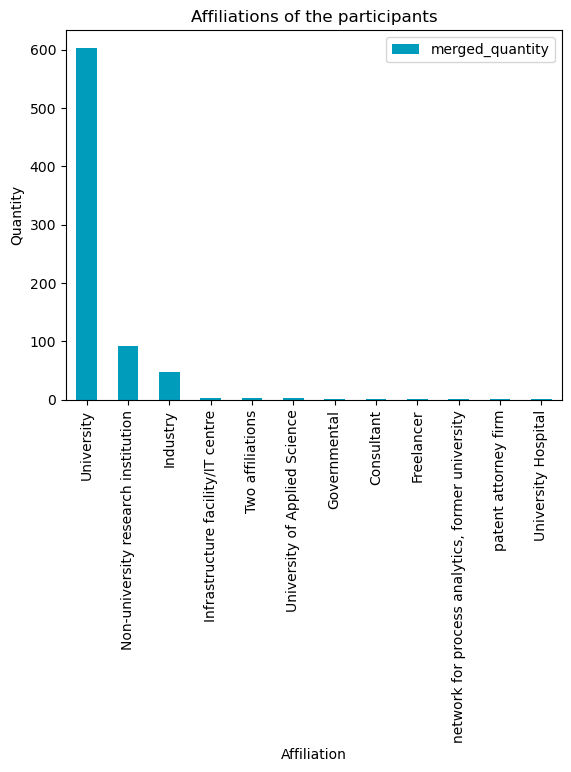

In [109]:
# Spalte "affiliation_in_total" als Index setzen
df_A002_merge.set_index('affiliation', inplace=True)

# Balkendiagramms mit den Werten aus der quantity-Spalte erstellen
df_A002_merge.plot.bar(color=petrol_rgb)

# Beschriftung für die X- und Y-Achse sowie den Titel des Diagramms hinzufügen
plt.xlabel('Affiliation')
plt.ylabel('Quantity')
plt.title('Affiliations of the participants')

# Diagramm anzeigen
plt.show()

## A03. Which position do you have in your institution?

In [110]:
df_cleanquest_2023[["CASE","A003","A003_07"]]

,CASE,A003,A003_07
0,191,7.0,NaN
1,203,2.0,NaN
3,208,-9.0,NaN
7,220,3.0,NaN
8,222,2.0,NaN
...,...,...,...
806,2545,1.0,NaN
807,2546,2.0,NaN
809,2552,1.0,NaN
810,2553,7.0,NaN


In [111]:
values_A003=df_values[df_values["VAR"]=="A003"]
values_A003

,VAR,RESPONSE,MEANING
261,A003,1,Professor
262,A003,2,Postdoc/Research Scientist/Permanent Researcher
263,A003,3,PhD student
264,A003,4,Master student
265,A003,5,Bachelor student
266,A003,6,Researcher in Industry
267,A003,7,Other:
268,A003,-9,nicht beantwortet


In [112]:
# Zahlen in den Zellen gegen die Bedeutung ersetzen
df_cleanquest_2023["A003-m"]=df_cleanquest_2023["A003"].map(values_A003.drop_duplicates("RESPONSE").set_index("RESPONSE")["MEANING"])
df_cleanquest_2023["A003-m"]

0                                               Other:
1      Postdoc/Research Scientist/Permanent Researcher
3                                    nicht beantwortet
7                                          PhD student
8      Postdoc/Research Scientist/Permanent Researcher
                            ...                       
806                                          Professor
807    Postdoc/Research Scientist/Permanent Researcher
809                                          Professor
810                                             Other:
811                                             Other:
Name: A003-m, Length: 768, dtype: object

In [113]:
df_cleanquest_2023[["CASE","A003","A003-m"]]

,CASE,A003,A003-m
0,191,7.0,Other:
1,203,2.0,Postdoc/Research Scientist/Permanent Researcher
3,208,-9.0,nicht beantwortet
7,220,3.0,PhD student
8,222,2.0,Postdoc/Research Scientist/Permanent Researcher
...,...,...,...
806,2545,1.0,Professor
807,2546,2.0,Postdoc/Research Scientist/Permanent Researcher
809,2552,1.0,Professor
810,2553,7.0,Other:


In [114]:
# Zellen mit gleichem Inhalt zählen
value_counts = df_cleanquest_2023['A003-m'].value_counts()

# Neuen df erzeugen
df_A003 = df_cleanquest_2023['A003-m'].value_counts().to_frame()

# Spalten benennen
df_A003.reset_index(inplace=True)

df_A003.rename(columns={'index': 'position', 'A003-m': 'quantity'}, inplace=True)

df_A003

,position,quantity
0,PhD student,250
1,Postdoc/Research Scientist/Permanent Researcher,185
2,Professor,166
3,Other:,56
4,Master student,55
5,Researcher in Industry,36
6,Bachelor student,16
7,nicht beantwortet,4


In [115]:
# Freitextantworten und Häufigkeit zur Frage anzeigen ->Spalte A003_07
df_A003_a = df_cleanquest_2023['A003_07'].value_counts().to_frame()

# Spalten benennen
df_A003_a.reset_index(inplace=True)

df_A003_a.rename(columns={'index': 'position', 'A003_07': 'quantity'}, inplace=True)

df_A003_a

,position,quantity
0,Owner,2
1,technician,2
2,Technician,2
3,Plant Manager,1
4,Junior group leader,1
5,Technical Staff,1
6,Technican,1
7,Laboratory Assistant,1
8,Engineer,1
9,patent attorney,1


In [116]:
# Begriffe werden zusammengefasst, um eine bessere Übersicht zu generieren und diese ggfs. mit den vorgegebenen Begriffen zusammenzuführen.

df_A003_a['position'] = df_A003_a['position'].replace(['technician', 'Technican', 'Technician', 'laboratory assistant', 'chemical technician', 'Lab Technician', 'Laboratory Assistant'], 'Technical Staff')

df_A003_a['position'] = df_A003_a['position'].replace(['Student Education', 'teacher student', 'Lehramt student', 'Lehramtsstudent (Teaching Student)', 'Lehramt GYM (Education)'], 'Student on teaching profession')

df_A003_a['position'] = df_A003_a['position'].replace(['Junior Group Leader','Engineer','scentific stuff, M.Sc.', 'Assistant', 'Scientist', 'Like professor but no title and no teaching duties', 'Junior group leader (Habilitand, Emmy Noether)', 'Junior group leader'], 'Postdoc/Research Scientist/Permanent Researcher')

df_A003_a['position'] = df_A003_a['position'].replace(['Plant Manager','Development Management','Scientific Management ','Pharmacovigilance Manager ','Pharmacovigilance Manager', 'Scientific Management', 'Managing Director', 'Research Manager', 'Product Manager'], 'Manager')

df_A003_a['position'] = df_A003_a['position'].replace('administrativ','Adminitrative Staff')

df_A003_a['position'] = df_A003_a['position'].replace(['retired Professor','retired professor'],'Professor')

df_A003_a['position'] = df_A003_a['position'].replace(['Research Data Manager','RDM manager','Research data management coordinator'],'Professor')

df_A003_a['position'] = df_A003_a['position'].replace(['bib','Chemical Librarian'],'Library Staff')

df_A003_a['position'] = df_A003_a['position'].replace(['Project Coordinator','Scientific Director of Department', 'Head of laboratory','Research coordination'],'Research/ Project Coordinator')

df_A003_a['position'] = df_A003_a['position'].replace('PhD Student + Research Scientist ','PhD student')

df_A003_a['position'] = df_A003_a['position'].replace('…','nicht beantwortet')

df_A003_a['position'] = df_A003_a['position'].replace(['Assistent and later Freelancer','Owner', 'patent attorney','Specialist Scouting, Consulting & Incubation ','New Business Development','Principal consultant'],'Non-research Staff')

df_A003_a['position'].value_counts()

Technical Staff                                    8
Manager                                            8
Postdoc/Research Scientist/Permanent Researcher    8
Non-research Staff                                 6
Professor                                          5
Student on teaching profession                     5
Research/ Project Coordinator                      4
Library Staff                                      2
nicht beantwortet                                  1
PhD student                                        1
Adminitrative Staff                                1
Name: position, dtype: int64

In [117]:
print(df_A003_a)

                                           position  quantity
0                                Non-research Staff         2
1                                   Technical Staff         2
2                                   Technical Staff         2
3                                           Manager         1
4   Postdoc/Research Scientist/Permanent Researcher         1
5                                   Technical Staff         1
6                                   Technical Staff         1
7                                   Technical Staff         1
8   Postdoc/Research Scientist/Permanent Researcher         1
9                                Non-research Staff         1
10                                nicht beantwortet         1
11  Postdoc/Research Scientist/Permanent Researcher         1
12                                          Manager         1
13                                        Professor         1
14                                      PhD student         1
15      

In [118]:
# Neuen df erzeugen mit den zusammengefassten Inhalten
df_A003_a_counted = df_A003_a['position'].value_counts().to_frame()

# Spalten umbenennen
df_A003_a_counted.reset_index(inplace=True)

df_A003_a_counted.rename(columns={'index': 'position', 'position': 'quantity'}, inplace=True)

df_A003_a_counted

,position,quantity
0,Technical Staff,8
1,Manager,8
2,Postdoc/Research Scientist/Permanent Researcher,8
3,Non-research Staff,6
4,Professor,5
5,Student on teaching profession,5
6,Research/ Project Coordinator,4
7,Library Staff,2
8,nicht beantwortet,1
9,PhD student,1


In [119]:
# DataFrames anhand des gemeinsamen Schlüssels 'position' zusammenführen
df_A003_merge = pd.merge(df_A003, df_A003_a_counted, on='position', how='outer')
df_A003_merge

,position,quantity_x,quantity_y
0,PhD student,250.0,1.0
1,Postdoc/Research Scientist/Permanent Researcher,185.0,8.0
2,Professor,166.0,5.0
3,Other:,56.0,NaN
4,Master student,55.0,NaN
5,Researcher in Industry,36.0,NaN
6,Bachelor student,16.0,NaN
7,nicht beantwortet,4.0,1.0
8,Technical Staff,NaN,8.0
9,Manager,NaN,8.0


In [120]:
# Spalten quantity_1 und quantity_2 zusammenführen und Werte summieren
df_A003_merge['merged_quantity'] = df_A003_merge[['quantity_x', 'quantity_y']].sum(axis=1)

# doppelte Werten in der Spalte "merged_affiliation" entfernen
df_A003_merge.drop_duplicates(subset='position', inplace=True)

# ursprüngliche Spalten löschen
df_A003_merge.drop(['quantity_x', 'quantity_y'], axis=1, inplace=True)

df_A003_merge

,position,merged_quantity
0,PhD student,251.0
1,Postdoc/Research Scientist/Permanent Researcher,193.0
2,Professor,171.0
3,Other:,56.0
4,Master student,55.0
5,Researcher in Industry,36.0
6,Bachelor student,16.0
7,nicht beantwortet,5.0
8,Technical Staff,8.0
9,Manager,8.0


In [121]:
# Zeile mit Index 3 löschen, weil sie in den Freitextantworten aufgeschlüsselt wurde und als solche eingefügt wurden.
df_A003_merge = df_A003_merge.drop(3)
print(df_A003_merge)

                                           position  merged_quantity
0                                       PhD student            251.0
1   Postdoc/Research Scientist/Permanent Researcher            193.0
2                                         Professor            171.0
4                                    Master student             55.0
5                            Researcher in Industry             36.0
6                                  Bachelor student             16.0
7                                 nicht beantwortet              5.0
8                                   Technical Staff              8.0
9                                           Manager              8.0
10                               Non-research Staff              6.0
11                   Student on teaching profession              5.0
12                    Research/ Project Coordinator              4.0
13                                    Library Staff              2.0
14                              Ad

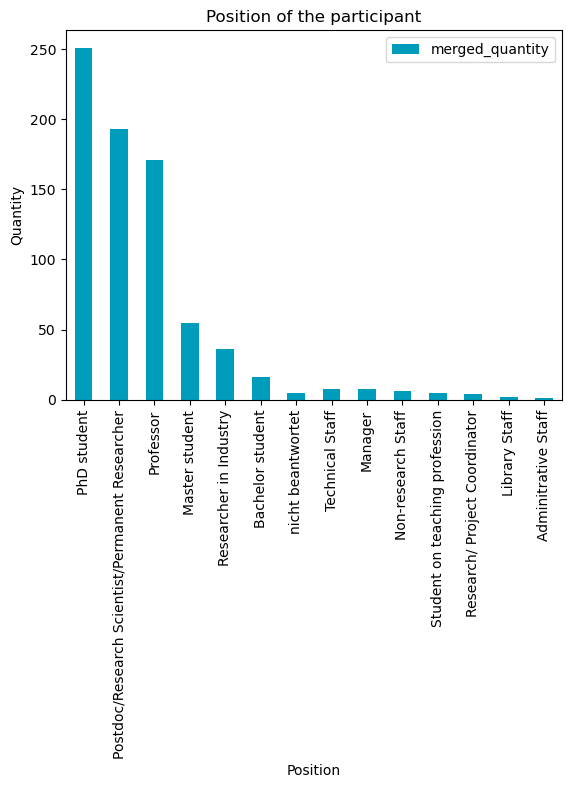

In [122]:
# Spalte "position" als Index setzen
df_A003_merge.set_index('position', inplace=True)

df_A003_merge.plot.bar(color=petrol_rgb)

plt.xlabel('Position')
plt.ylabel('Quantity')
plt.title('Position of the participant')

# Diagramm anzeigen
plt.show()

## A04. To which discipline do you assign yourself?

In [123]:
# Spalten mit Namen, die "A004" enthalten, anzeigen
df_A004 = df_cleanquest_2023.filter(like='A004')
df_A004

,A004,A004_01,A004_02,A004_03,A004_04,A004_05,A004_06,A004_07,A004_08,A004_09,A004_10,A004_11,A004_12,A004_13,A004_13a
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,Cheminformatics
3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,Atmospheric chemistry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
807,7.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,Polymer Chemistry.
809,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
810,4.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN


In [124]:
# Leeres Dictionary für die Werte erstellen
values_dict = {}

# For-Schleife
for col_name in df_A004:
    values_dict[col_name] = df_values[df_values["VAR"] == col_name]

# Ergebnisse anzeigen
for col_name, values_df in values_dict.items():
    print(f"Values for {col_name}:")
    print(values_df)
    print()

Values for A004:
Empty DataFrame
Columns: [VAR, RESPONSE, MEANING]
Index: []

Values for A004_01:
         VAR  RESPONSE        MEANING
269  A004_01         1  nicht gewählt
270  A004_01         2     ausgewählt

Values for A004_02:
         VAR  RESPONSE        MEANING
271  A004_02         1  nicht gewählt
272  A004_02         2     ausgewählt

Values for A004_03:
         VAR  RESPONSE        MEANING
273  A004_03         1  nicht gewählt
274  A004_03         2     ausgewählt

Values for A004_04:
         VAR  RESPONSE        MEANING
275  A004_04         1  nicht gewählt
276  A004_04         2     ausgewählt

Values for A004_05:
         VAR  RESPONSE        MEANING
277  A004_05         1  nicht gewählt
278  A004_05         2     ausgewählt

Values for A004_06:
         VAR  RESPONSE        MEANING
279  A004_06         1  nicht gewählt
280  A004_06         2     ausgewählt

Values for A004_07:
         VAR  RESPONSE        MEANING
281  A004_07         1  nicht gewählt
282  A004_07    

In [125]:
df_variables = pd.DataFrame (variables)

# Zeilen von Index 12 bis 27 anzeigen
selected_rows_A004 = df_variables.iloc[12:27]
selected_rows_A004

,VAR,LABEL,TYPE,INPUT,QUESTION
12,A004,Discipline : Ausweichoption (negativ) oder Anz...,METRIC,SYSTEM,To which discipline do you assign yourself?
13,A004_01,Discipline : Inorganic chemistry,DICHOTOMOUS,CHECKBOX,To which discipline do you assign yourself?
14,A004_02,Discipline : Organic chemistry,DICHOTOMOUS,CHECKBOX,To which discipline do you assign yourself?
15,A004_03,Discipline : Physical chemistry,DICHOTOMOUS,CHECKBOX,To which discipline do you assign yourself?
16,A004_04,Discipline : Chemical engineering,DICHOTOMOUS,CHECKBOX,To which discipline do you assign yourself?
17,A004_05,Discipline : Theoretical chemistry,DICHOTOMOUS,CHECKBOX,To which discipline do you assign yourself?
18,A004_06,Discipline : Pharmacy/Pharmaceutical chemistry,DICHOTOMOUS,CHECKBOX,To which discipline do you assign yourself?
19,A004_07,Discipline : Material science,DICHOTOMOUS,CHECKBOX,To which discipline do you assign yourself?
20,A004_08,Discipline : Biochemistry,DICHOTOMOUS,CHECKBOX,To which discipline do you assign yourself?
21,A004_09,Discipline : Analytical chemistry,DICHOTOMOUS,CHECKBOX,To which discipline do you assign yourself?


In [126]:
# Spalten umbenennen, so dass Teildisziplin bekannt wird
# Dictionary erstellen
col_name_clear = {
    'A004': 'Ausweichoption (negativ) oder Anzahl',
    'A004_01': 'Inorganic chemistry',
    'A004_02': 'Organic chemistry',
    'A004_03': 'Physical chemistry',
    'A004_04': 'Chemical engineering',
    'A004_05': 'Theoretical chemistry',
    'A004_06': 'Pharmacy/Pharmaceutical chemistry',
    'A004_07': 'Material science',
    'A004_08': 'Biochemistry',
    'A004_09': 'Analytical chemistry',
    'A004_10': 'Metabolomics',
    'A004_11': 'Proteomics',
    'A004_12': 'Medicinal chemistry',
    'A004_13': 'Other',
    'A004_13a': 'open text'
}

df_A004 = df_A004.rename(columns=col_name_clear)

df_A004

,Ausweichoption (negativ) oder Anzahl,Inorganic chemistry,Organic chemistry,Physical chemistry,Chemical engineering,Theoretical chemistry,Pharmacy/Pharmaceutical chemistry,Material science,Biochemistry,Analytical chemistry,Metabolomics,Proteomics,Medicinal chemistry,Other,open text
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,Cheminformatics
3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,Atmospheric chemistry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
807,7.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,Polymer Chemistry.
809,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
810,4.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,NaN


In [127]:
# Anzahl der Werte 2 in den Spalten A004_01 - A004_13 zählen
df_A004_count = df_A004.apply(lambda col: (col == 2).sum()).to_frame()

# Spalten umbenennen
df_A004_count.reset_index(inplace=True)

df_A004_count.rename(columns={'index':'subdiscipline', 0:'quantity'}, inplace=True)

# Index 0 entfernen
df_A004_count = df_A004_count.drop(0)
df_A004_count

,subdiscipline,quantity
1,Inorganic chemistry,206
2,Organic chemistry,250
3,Physical chemistry,146
4,Chemical engineering,56
5,Theoretical chemistry,61
6,Pharmacy/Pharmaceutical chemistry,33
7,Material science,102
8,Biochemistry,74
9,Analytical chemistry,88
10,Metabolomics,14


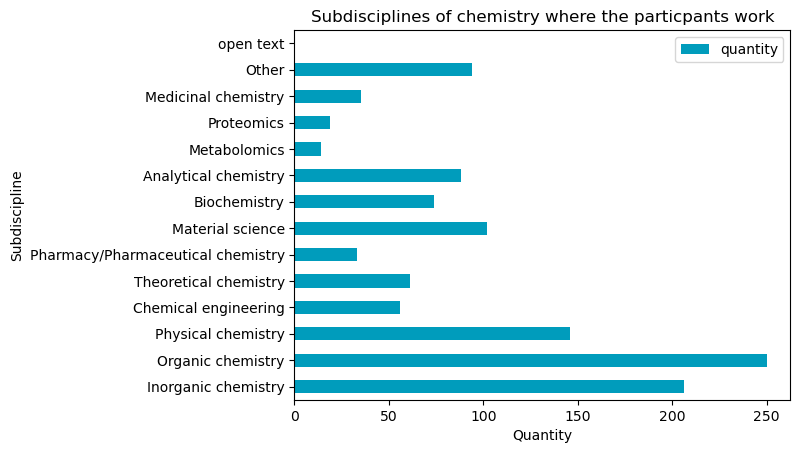

In [128]:
# Spalte "subdiscipline" als Index setzen
df_A004_count.set_index('subdiscipline', inplace=True)

df_A004_count.plot.barh(color=petrol_rgb)

plt.xlabel('Quantity')
plt.ylabel('Subdiscipline')
plt.title('Subdisciplines of chemistry where the particpants work')

# Diagramm anzeigen
plt.show()

In [129]:
# Freitextantworten und Häufigkeit zur Frage anzeigen ->Spalte A004_13a
df_A004_a = df_cleanquest_2023['A004_13a'].value_counts().to_frame()

# Spaltennamen anpassen
df_A004_a.reset_index(inplace=True)

df_A004_a.rename(columns={'index': 'subdiscipline', 'A004_13a': 'quantity'}, inplace=True)
print(df_A004_a)

               subdiscipline  quantity
0        Technical Chemistry         5
1           Electrochemistry         4
2   Macromolecular Chemistry         4
3          Polymer chemistry         4
4          Polymer Chemistry         3
..                       ...       ...
61  Organometallic Chemistry         1
62     Atmospheric chemistry         1
63       Chemical Technology         1
64            Food chemistry         1
65        Polymer Chemistry.         1

[66 rows x 2 columns]


In [130]:
# Werte mit gleicher Bedeutung zusammenführen
df_A004_a['subdiscipline'] = df_A004_a['subdiscipline'].apply(lambda x: 'Biology' if 'bio' in x.lower() else 
                                                               ('Catalysis' if 'cat' in x.lower() else 
                                                                ('Technical chemistry' if 'tec' in x.lower() else 
                                                                 ('Environmental chemistry' if 'enviro' in x.lower() else 
                                                                  ('Chemoinformatics' if 'info' in x.lower() or 'com' in x.lower() else 
                                                                   ('Industrial chemistry' if 'ind' in x.lower() else 
                                                                    ('Food chemistry' if 'food' in x.lower() else 
                                                                     ('Organic chemistry' if 'org' in x.lower() or 'syn' in x.lower() else
                                                                      ('Didactics/Teaching' if 'did' in x.lower() or 'tea' in x.lower() else
                                                                       ('Electrochemistry' if 'electro' in x.lower() else
                                                                        ('Polymer chemistry' if 'poly' in x.lower() or 'macro' in x.lower() or 'plas' in x.lower() else x)))))))))))

df_A004_a['subdiscipline'] = df_A004_a['subdiscipline'].replace(['Infrastructure','IT','Research Data Management in Chemistry'],'Infrastructure/RDM')

df_A004_a['subdiscipline'] = df_A004_a['subdiscipline'].replace(['…','All of the above','Not assigned yet'],'Not answered')

# Zellen mit gleichem Inhalt zusammenfassen und die Quantitäten addieren
df_A004_a_grouped = df_A004_a.groupby('subdiscipline')['quantity'].sum().reset_index(name='quantity')

# Ergebnisse nach Häufigkeit sortieren
df_A004_a_sorted = df_A004_a_grouped.sort_values(by='quantity', ascending=False)

df_A004_a_sorted

,subdiscipline,quantity
22,Polymer chemistry,19
25,Technical chemistry,8
5,Chemoinformatics,8
2,Biology,7
3,Catalysis,6
9,Electrochemistry,5
19,Organic chemistry,5
11,Food chemistry,4
8,Didactics/Teaching,3
16,Not answered,3


In [131]:
# DataFrames anhand des gemeinsamen Schlüssels 'subdiscipline' zusammenführen
df_A004_merge = pd.merge(df_A004_count, df_A004_a_sorted, on='subdiscipline', how='outer')

# Spalten quantity_x und quantity_y zusammenführen und Werte summieren
df_A004_merge['merged_quantity'] = df_A004_merge[['quantity_x', 'quantity_y']].sum(axis=1)

# doppelte Werte in der Spalte "merged_affiliation" entfernen
df_A004_merge.drop_duplicates(subset='subdiscipline', inplace=True)

# ursprüngliche Spalten löschen
df_A004_merge.drop(['quantity_x', 'quantity_y'], axis=1, inplace=True)

df_A004_merge

,subdiscipline,merged_quantity
0,Inorganic chemistry,206.0
1,Organic chemistry,255.0
2,Physical chemistry,146.0
3,Chemical engineering,56.0
4,Theoretical chemistry,61.0
5,Pharmacy/Pharmaceutical chemistry,33.0
6,Material science,102.0
7,Biochemistry,74.0
8,Analytical chemistry,88.0
9,Metabolomics,14.0


In [132]:
# Zeile mit Index 12 löschen, weil sie in den Freitextantworten aufgeschlüsselt wurde und als solche eingefügt wurden.

rows_to_delete = [12,13]

df_A004_merge = df_A004_merge.drop(rows_to_delete)
df_A004_merge

,subdiscipline,merged_quantity
0,Inorganic chemistry,206.0
1,Organic chemistry,255.0
2,Physical chemistry,146.0
3,Chemical engineering,56.0
4,Theoretical chemistry,61.0
5,Pharmacy/Pharmaceutical chemistry,33.0
6,Material science,102.0
7,Biochemistry,74.0
8,Analytical chemistry,88.0
9,Metabolomics,14.0


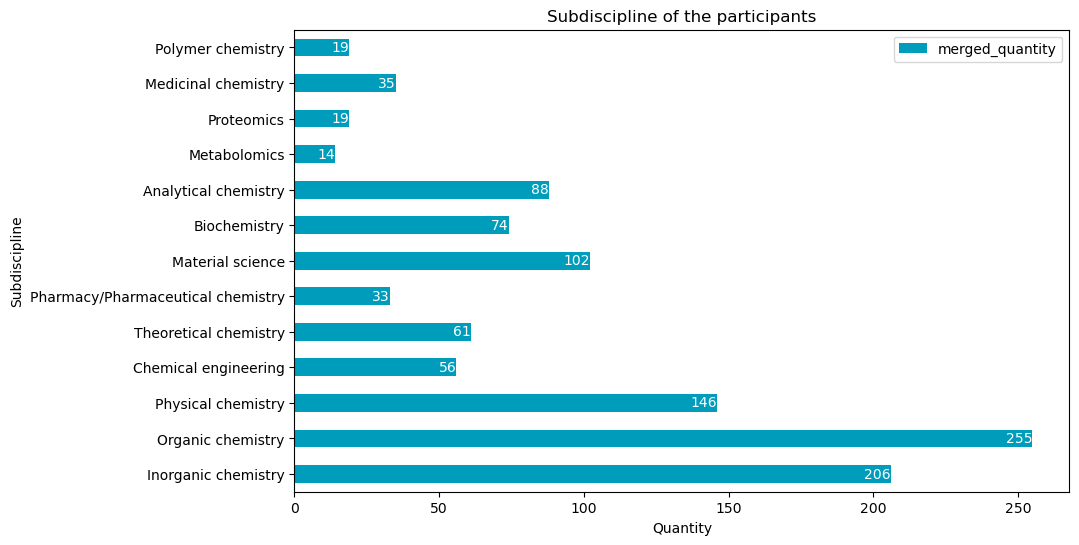

In [133]:
# Spalte "subdiscipline" als Index setzen
df_A004_merge.set_index('subdiscipline', inplace=True)

# Zeilen mit einer Quantity von über 10 filtern
df_A004_merge_filter = df_A004_merge[df_A004_merge['merged_quantity'] > 10]

# Größe des Diagramms anpassen
fig, ax = plt.subplots(figsize=(10, 6))

# Daten als horizontales Balkendiagramm plotten
bars_A004 = df_A004_merge_filter.plot.barh(ax=ax, color=petrol_rgb)

# absolute Werte in die Balken einfügen
for bar in bars_A004.patches:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, int(bar.get_width()),
            va='center', ha='right', color='white')

plt.xlabel('Quantity')
plt.ylabel('Subdiscipline')
plt.title('Subdiscipline of the participants')

# Diagramm anzeigen
plt.show()
